In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [84]:
dataset1=pd.read_csv('C:/Users/Thanuja.K/Documents/Thanuja/DataSets/Walmart - train - Copy.csv')

In [85]:
dataset2=pd.read_csv('C:/Users/Thanuja.K/Documents/Thanuja/DataSets/Walmart - stores.csv')

In [86]:
dataset3=pd.read_csv('C:/Users/Thanuja.K/Documents/Thanuja/DataSets/walmart-recruiting-store-sales-forecasting/features.csv')

In [87]:
df1=pd.DataFrame(dataset1)
df2=pd.DataFrame(dataset2)
df3=pd.DataFrame(dataset3)

In [88]:
finaldatafeature=pd.merge(df1,df2)
finaldata=pd.merge(finaldatafeature,df3)

In [101]:
finaldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null int64
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
Type            421570 non-null object
Size            421570 non-null int64
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       150681 non-null float64
MarkDown2       111248 non-null float64
MarkDown3       137091 non-null float64
MarkDown4       134967 non-null float64
MarkDown5       151432 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
dtypes: bool(1), float64(10), int64(4), object(1)
memory usage: 51.9+ MB


In [90]:
finaldata.describe()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,136727.915739,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289
std,12.785297,30.492054,22711.183519,60980.583328,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296
min,1.000000,1.000000,-4988.940000,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000
25%,11.000000,18.000000,2079.650000,93638.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000
50%,22.000000,37.000000,7612.030000,140167.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000
75%,33.000000,74.000000,20205.852500,202505.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000
max,45.000000,99.000000,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000


In [91]:
finaldata.keys()

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment'],
      dtype='object')

In [92]:
finaldata.shape

(421570, 16)

In [93]:
finaldata.isnull().values.any()

True

In [100]:
finaldata['Date']=pd.to_numeric(finaldata['Date'])

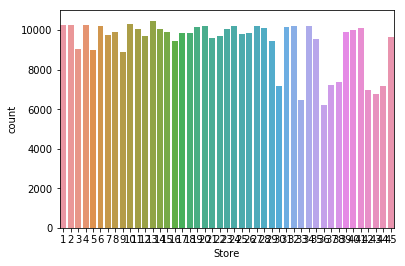

In [19]:
sns.countplot(x='Store', data=finaldata)

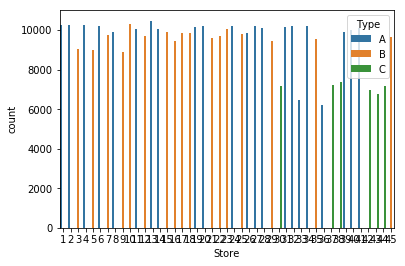

In [20]:
sns.countplot(x='Store', hue='Type', data=finaldata)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


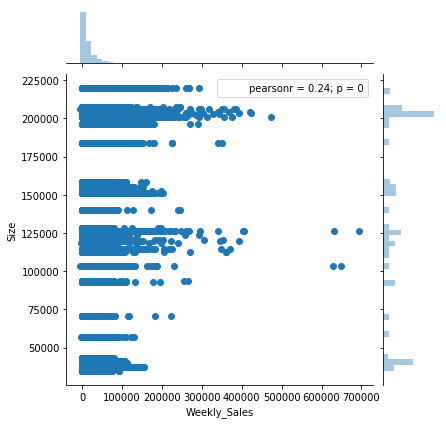

In [21]:
sns.jointplot('Weekly_Sales', 'Size', data=finaldata)

In [ ]:
sns.jointplot('Weekly_Sales', 'Size', data=finaldata)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


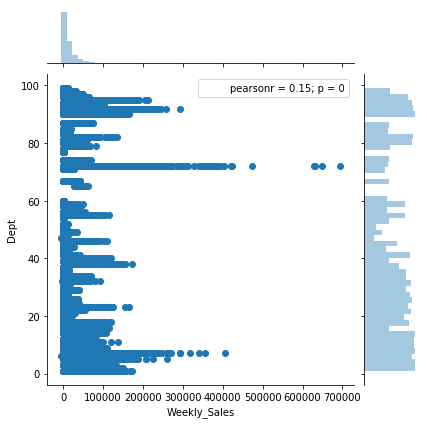

In [22]:
sns.jointplot('Weekly_Sales','Dept', data=finaldata)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


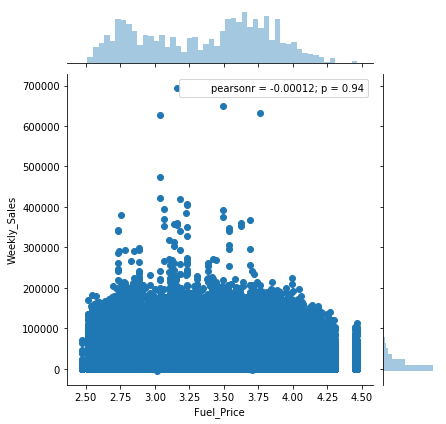

In [23]:
sns.jointplot('Fuel_Price','Weekly_Sales', data=finaldata)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


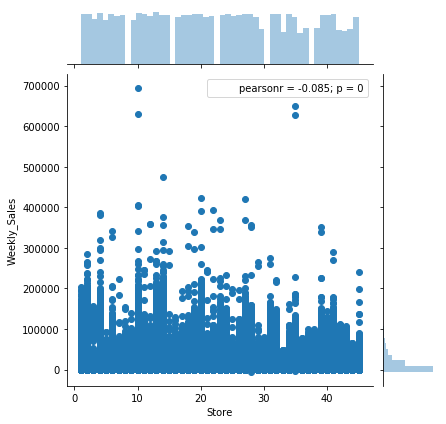

In [24]:
sns.jointplot('Store','Weekly_Sales', data=finaldata )

In [25]:
finaldata.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64

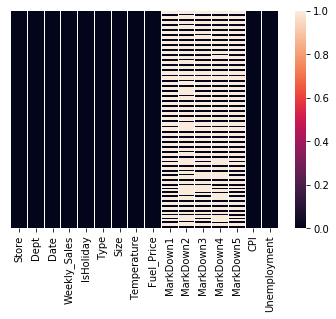

In [26]:
sns.heatmap(finaldata.isnull(), yticklabels=False)

In [ ]:
finaldata.fillna(0)

In [ ]:
sns.heatmap(finaldata.isnull(), yticklabels=False)

In [ ]:
finaldata.isnull().sum()

In [28]:
finaldata.fillna(0, inplace=True)

In [82]:
finaldata['Date']=pd.to_datetime(finaldata['Date'])

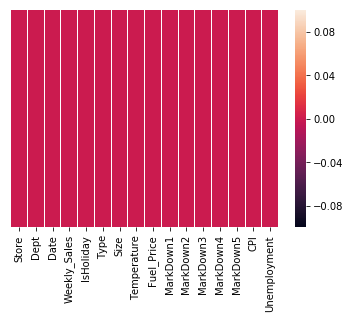

In [29]:
sns.heatmap(finaldata.isnull(), yticklabels=False)

In [30]:
finaldata.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64

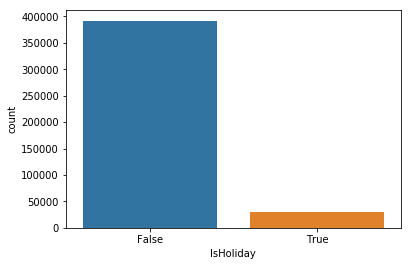

In [31]:
sns.countplot("IsHoliday",data=finaldata)

In [ ]:
sns.heatmap(finaldata.isnull(), yticklabels=False)

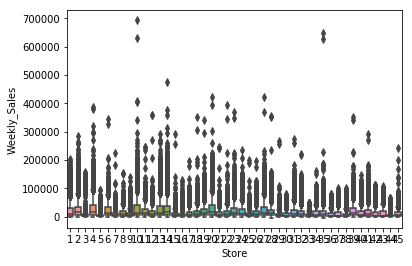

In [32]:
sns.boxplot(x='Store',y='Weekly_Sales',data=finaldata)

In [102]:
x=finaldata[['Store','Dept','IsHoliday','Date']]
y=finaldata['Weekly_Sales']

In [103]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=12)

In [105]:
dtr = DecisionTreeRegressor()

In [106]:
dtr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [63]:
predictions = dtr.predict(X_test)

In [107]:
predictions[0]

10105.25291262136

In [108]:
r2_score(y_test, predictions)

0.9037763231788336

In [109]:
print(len(X_test))
print(len(y_pred))

84314
84314


In [111]:
prediction = pd.DataFrame(predictions, columns=['predictions']).to_csv('prediction.csv')

In [112]:
predictions

array([10105.25291262,  3605.6972973 ,  1558.80285714, ...,
       97569.03869159, 15542.73367925, 31660.41504425])

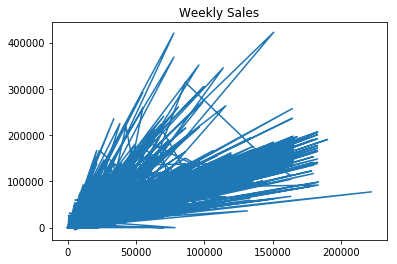

In [113]:
plt.plot(predictions,y_test)
plt.title('Weekly Sales')
plt.show()